# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera
#### Table of contents
* [Introduction: Business Problem](#introduction)
* [Import Libraries](#libraries)
* [Data](#data)
* [Data Preprocessing & Exporatory](#exploratory)
* [Modelling](#modelling)

## Introduction: Business Problem <a name="introduction"></a>

In this project, I'm trying to build a model to predict car accident severity.

Specifically, I will use the data science powers to build a predictive model that can warn drivers about the possibility of getting into a car accident and the potential severity, so that the drivers can drive more carefully or reroute if possible. 

## Import Libraries <a name="libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Data <a name="data"></a>

The dataset in use lists collisions from 2004 to May 2020 in Seattle, recorded by Seattle Department of Transportation (SDOT).

In [2]:
# download dataset
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-15 04:09:23--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.0MB/s   in 1.6s   

2020-09-15 04:09:25 (43.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
# load data
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

## Data Preprocessing & Analysis <a name="exploratory"></a>

By examining the meaning of each column within the dataset, I decided to remove the following columns:
* **SEVERITYCODE:** A code that corresponds to the severity of the collision. This column is the same as column 'SEVERITYDESC' which gives the detailed description of the severity of the collision. Therefore, either of the two columns can be removed.
* **OBJECTID, INCKEY, COLDETKEY, REPORTNO, INTKEY, SDOT_COLCODE, SDOT_COLDESC, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY:** These are identities assigned to the collisions by SDOT and have no meaning in predicting the accident; thus, can be removed.
* **STATUS:** There is no description available for this attribute. It has two values "Matched", and "Unmatched".
* **ADDRTYPE, LOCATION:** Detailed address of collision locations. This corresponds with the two columns of longitude and latitude. The columns of longitude and latitude are better inputs into the model because the location attribute is of high cardinality.
* **EXCEPTRSNCODE, EXCEPTRSNDESC:** The two columns gives some notes about data as "not enough information", etc. 
* **COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR:** The attributes give details on collision outcomes, while the models aims at predicting the accident. Thus, the variables will be removed.
* **INCDATE:** The date of accident. This is part of another variable "INCDTTM" that shows date and time of the accident.
* **JUNCTIONTYPE**: This attribute is similar to "ADDRTYPE".

In [5]:
drop_var = ['SEVERITYCODE','OBJECTID','INCKEY','COLDETKEY','REPORTNO','INTKEY','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
            'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','STATUS','ADDRTYPE','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','COLLISIONTYPE','PERSONCOUNT',
            'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR','INCDATE',
            'JUNCTIONTYPE','SEVERITYCODE.1']
df=df.drop(drop_var,axis=1)
df.head(3)

,X,Y,SEVERITYDESC,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,-122.323148,47.703140,Injury Collision,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,-122.347294,47.647172,Property Damage Only Collision,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,-122.334540,47.607871,Property Damage Only Collision,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight


Description of the remaining columns:
* **X, Y**: longitude & latitude of the collision location
* **ADDRTYPE:** collision address type, alley, block, or intersection
* **SEVERITYDESC:** a detailed description of the severity of the collision
* **INCDTTM:** date and time of the accident
* **WEATHER:** description of the weather conditions during the time of the collision
* **ROADCOND:** The condition of the road during collision
* **LIGHTCOND:** The light conditions during the collision

In [6]:
df.dtypes

X               float64
Y               float64
SEVERITYDESC     object
INCDTTM          object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

#### Missing values

In [7]:
# percentage of null values per columns
df.isnull().sum().div(df.shape[0],axis=0).mul(100).to_frame().transpose()
# null values per columns account for insignificant percentages of the total dataset

,X,Y,SEVERITYDESC,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2.739979,2.739979,0.0,0.0,2.610018,2.574574,2.655736


In [8]:
# number of rows with missing values
df.isnull().any(axis=1).sum()
# an insignificant number of rows with missing values in the big dataset, thus rows with NAs will be removed

10506

In [9]:
df = df.dropna()
df.shape

(184167, 7)

In [10]:
df['WEATHER'].value_counts()

Clear                       108833
Raining                      31987
Overcast                     27105
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [11]:
df['ROADCOND'].value_counts()

Dry               121871
Wet                46009
Unknown            13795
Ice                 1174
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64

In [12]:
df['LIGHTCOND'].value_counts()

Daylight                    113522
Dark - Street Lights On      47250
Unknown                      12416
Dusk                          5763
Dawn                          2422
Dark - No Street Lights       1450
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

It can be seen that 'WEATHER', 'ROADCOND', and 'LIGHTCOND' contain values 'Unknown' that are similar to null values. Those observations need to be removed from the dataset.

In [13]:
# remove values 'Unknown' - 17,462 observations
df=df.loc[(df['WEATHER']!='Unknown') & (df['ROADCOND']!='Unknown') & (df['LIGHTCOND']!='Unknown')]
df.shape

(166705, 7)

#### Convert object to datetime

In [14]:
# convert 'INCDTTM' to datetime format, extract month, day of week, and hour
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['year']=df['INCDTTM'].dt.year
df['month']=df['INCDTTM'].dt.month
df['dayofweek']=df['INCDTTM'].dt.dayofweek
df['hour']=df['INCDTTM'].dt.hour
df=df.drop('INCDTTM',axis=1)
df.head(3)

,X,Y,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND,year,month,dayofweek,hour
0,-122.323148,47.703140,Injury Collision,Overcast,Wet,Daylight,2013,3,2,14
1,-122.347294,47.647172,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On,2006,12,2,18
2,-122.334540,47.607871,Property Damage Only Collision,Overcast,Dry,Daylight,2004,11,3,10


Because the original dataset is too large and modelling takes too long to be finished, I decided to reduce the data size by using data from 2018 to present.

In [15]:
df=df.loc[df['year']>2017]
df=df.drop('year',axis=1)
df.shape

(18708, 9)

#### Exploratory

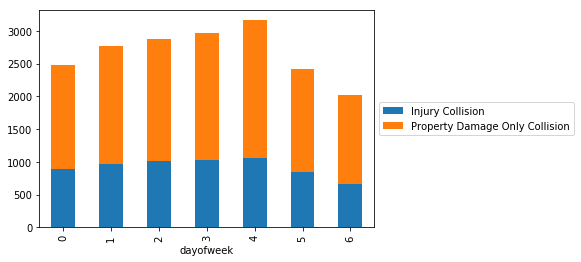

In [16]:
# statement: car accidents are more severe on weekdays?
day_df=pd.pivot_table(df,index='dayofweek',columns='SEVERITYDESC',values='WEATHER',aggfunc='count')
ax = day_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# car accidents are more likely to happen during weekdays, specially on Fridays. about 1/3 involes injuries.

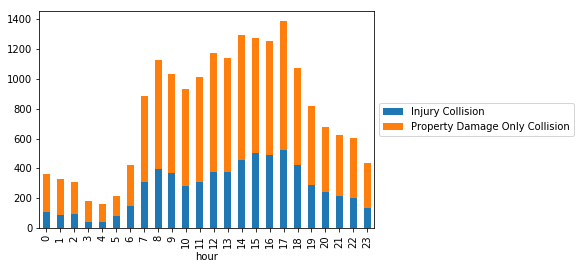

In [17]:
# statement: car accidents are more severe depending on time during a day?
hour_df=pd.pivot_table(df,index='hour',columns='SEVERITYDESC',values='WEATHER',aggfunc='count')
ax = hour_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# car accidents are more likely to happen between 7am till midnight.
# accident frequency is high during peak hours in the afternoon.

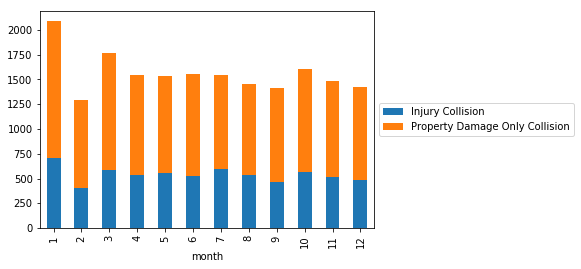

In [18]:
# statement: car accidents are more severe depending on month?
month_df=pd.pivot_table(df,index='month',columns='SEVERITYDESC',values='WEATHER',aggfunc='count')
ax = month_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# the chart shows that January has the highest number of accidents

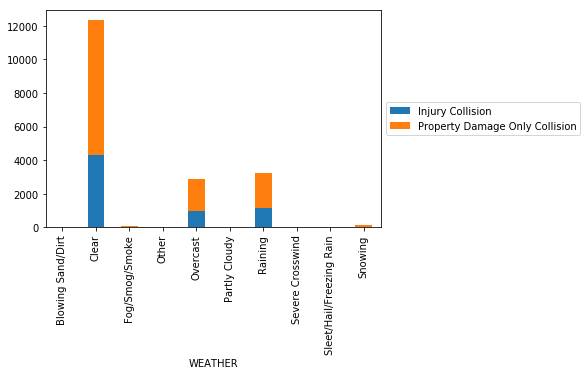

In [19]:
# statement: car accidents are more severe depending on weather?
weather_df=pd.pivot_table(df,index='WEATHER',columns='SEVERITYDESC',values='month',aggfunc='count')
ax = weather_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# accidents happen a lot when the weather condition is clear, overcast or raining

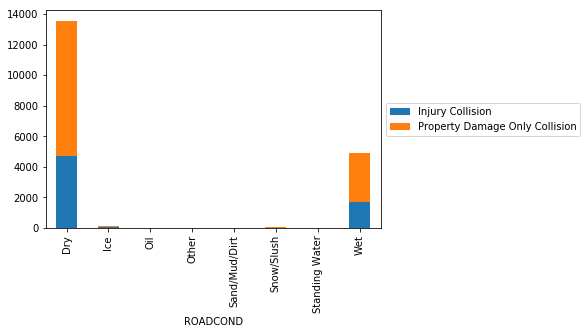

In [20]:
# statement: car accidents are more severe depending on road conditions?
road_df=pd.pivot_table(df,index='ROADCOND',columns='SEVERITYDESC',values='month',aggfunc='count')
ax = road_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# accidents happen a lot when the road condition is dry or wet

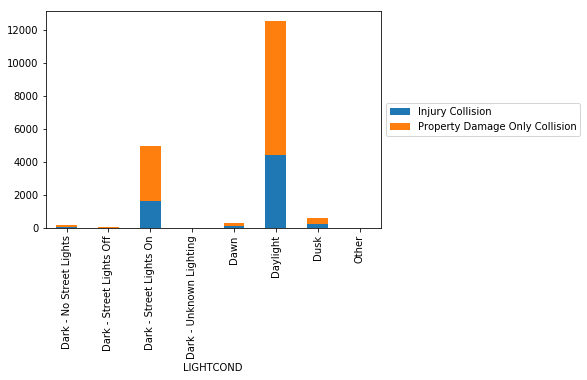

In [21]:
# statement: car accidents are more severe depending on light conditions?
light_df=pd.pivot_table(df,index='LIGHTCOND',columns='SEVERITYDESC',values='month',aggfunc='count')
ax = light_df.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# accidents still happen a lot when the light condition is daylight or when it's dark with street lights on

#### Prepare for modelling

In [22]:
# check class balance
df['SEVERITYDESC'].value_counts()

# it is noted that there is an imbance between two classes of the target variable. however, the imbalance is not so serious;
# thus, I will not oversample the train data.

Property Damage Only Collision    12231
Injury Collision                   6477
Name: SEVERITYDESC, dtype: int64

In [23]:
df = pd.get_dummies(data=df, columns=['WEATHER', 'ROADCOND','LIGHTCOND']).drop(['WEATHER_Other','ROADCOND_Other','LIGHTCOND_Other'],axis=1)
df.head(3)

,X,Y,SEVERITYDESC,month,dayofweek,hour,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,...,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
5,-122.387598,47.690575,Property Damage Only Collision,4,5,17,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,-122.320780,47.614076,Injury Collision,4,2,17,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
18,-122.328270,47.571420,Injury Collision,4,4,14,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.shape

(18708, 29)

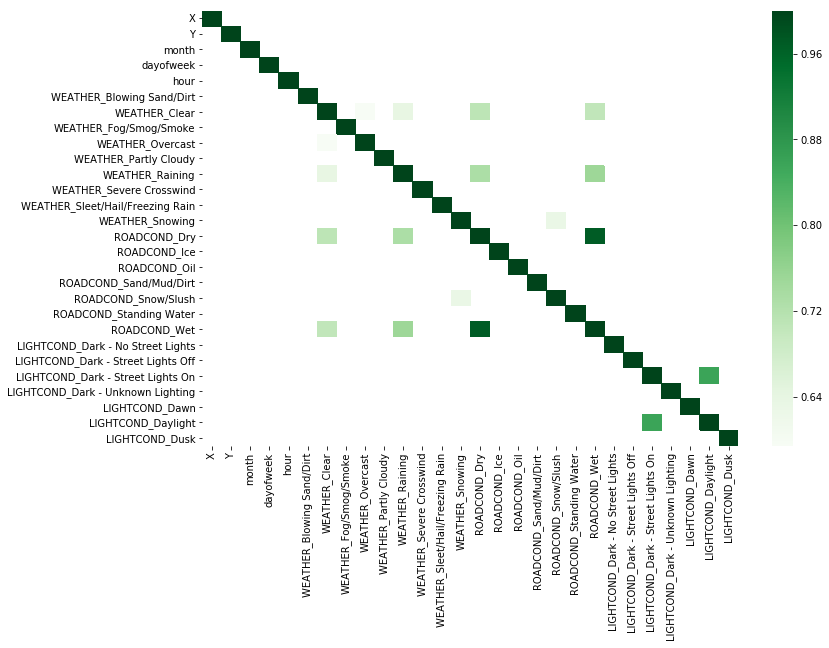

In [25]:
import matplotlib as plt
corr = df.corr().abs()
kot = corr[corr>=.5]
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

Based on the heatmap, pairs of columns with correlation over 0.5 or under -0.5 are as below:
* WEATHER_Clear vs **WEATHER_Overcast**
* WEATHER_Clear vs **WEATHER_Raining**
* WEATHER_Clear vs **ROADCOND_Dry**
* WEATHER_Clear vs **ROADCOND_Wet**
* **WEATHER_Raining** vs **ROADCOND_Dry**
* **WEATHER_Raining** vs **ROADCOND_Wet**
* WEATHER_Snowing vs **ROADCOND_Snow/Slush**
* **ROADCOND_Dry** vs **ROADCOND_Wet**
* LIGHTCOND_Daylight vs **LIGHTCOND_Dark - Street Lights On**

The variables in bold will be removed.

In [26]:
high_corr_cols = ['WEATHER_Overcast','WEATHER_Raining','ROADCOND_Dry','ROADCOND_Wet','ROADCOND_Snow/Slush',
                  'LIGHTCOND_Dark - Street Lights On']
df=df.drop(high_corr_cols,axis=1)
df.shape

(18708, 23)

In [27]:
df.columns

Index(['X', 'Y', 'SEVERITYDESC', 'month', 'dayofweek', 'hour',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Partly Cloudy', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'ROADCOND_Ice',
       'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Standing Water',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk'],
      dtype='object')

In [28]:
X = df.drop('SEVERITYDESC',axis=1)
X[0:5]

,X,Y,month,dayofweek,hour,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Partly Cloudy,WEATHER_Severe Crosswind,...,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Standing Water,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
5,-122.387598,47.690575,4,5,17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,-122.320780,47.614076,4,2,17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,-122.328270,47.571420,4,4,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,-122.312857,47.599218,4,3,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,-122.318741,47.676567,4,5,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y = df['SEVERITYDESC'].values
y[0:5]

array(['Property Damage Only Collision', 'Injury Collision',
       'Injury Collision', 'Injury Collision',
       'Property Damage Only Collision'], dtype=object)

#### Normalize Data 

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.94843773,  1.29648915, -0.65601828,  1.1063952 ,  0.7102025 ,
        -0.02636993,  0.71819197, -0.06128432, -0.01635044, -0.01791149,
        -0.02068351, -0.07512823, -0.07512823, -0.01635044, -0.01266432,
        -0.01791149, -0.09661104, -0.0695272 , -0.02193876, -0.12570051,
         0.70039883, -0.18187214],
       [ 0.32035681, -0.03210755, -0.65601828, -0.47625611,  0.7102025 ,
        -0.02636993,  0.71819197, -0.06128432, -0.01635044, -0.01791149,
        -0.02068351, -0.07512823, -0.07512823, -0.01635044, -0.01266432,
        -0.01791149, -0.09661104, -0.0695272 , -0.02193876, -0.12570051,
         0.70039883, -0.18187214],
       [ 0.06606447, -0.77291471, -0.65601828,  0.57884476,  0.16317162,
        -0.02636993,  0.71819197, -0.06128432, -0.01635044, -0.01791149,
        -0.02068351, -0.07512823, -0.07512823, -0.01635044, -0.01266432,
        -0.01791149, -0.09661104, -0.0695272 , -0.02193876, -0.12570051,
         0.70039883, -0.18187214],
       [ 0.58938562

## Modelling <a name="modelling"></a>

#### Train-Test set split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14031, 22) (14031,)
Test set: (4677, 22) (4677,)


#### kNN

In [34]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55184948, 0.47958093, 0.57772076, 0.53624118, 0.588839  ,
       0.56061578, 0.59183237, 0.56403678, 0.59803293])

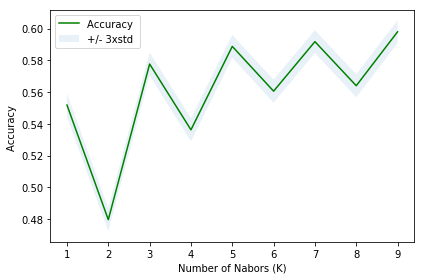

In [39]:
import matplotlib.pyplot as plt 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.598032927090015 with k= 9


In [40]:
k = 9
#Train Model
kNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#Predict
yhat_knn = kNN_model.predict(X_test)
yhat[0:5]

array(['Property Damage Only Collision', 'Injury Collision',
       'Injury Collision', 'Injury Collision',
       'Property Damage Only Collision'], dtype=object)

In [41]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.6910412657686551
Test set Accuracy:  0.598032927090015


In [42]:
from sklearn.metrics import confusion_matrix

# create confusion matrix for test set
print("Confusion Matrix:")
conf_mat = confusion_matrix(y_true=y_test, y_pred=yhat_knn)
print(conf_mat)

Confusion Matrix:
[[ 289 1349]
 [ 531 2508]]


#### Decision Trees

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
yhat_dt = DT_model.predict(X_test)
yhat_dt[0:5]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [91]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_dt))

Train set Accuracy:  0.670515287577507
Test set Accuracy:  0.6405815693820825


In [92]:
from sklearn.metrics import confusion_matrix

# create confusion matrix for test set
print("Confusion Matrix:")
conf_mat = confusion_matrix(y_true=y_test, y_pred=yhat_dt)
print(conf_mat)

Confusion Matrix:
[[ 103 1535]
 [ 146 2893]]


By changing max_depth values, I chose max_depth = 9 with the best accuracy without overfitting issue.

#### Support Vector Machine

In [122]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [123]:
yhat_svm = clf.predict(X_test)
yhat_svm[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [124]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

Train set Accuracy:  0.6098638728529684
Test set Accuracy:  0.6142826598246739


In [125]:
from sklearn.metrics import confusion_matrix

# create confusion matrix for test set
print("Confusion Matrix:")
conf_mat = confusion_matrix(y_true=y_test, y_pred=yhat_svm)
print(conf_mat)

Confusion Matrix:
[[ 169 1469]
 [ 335 2704]]


#### kernel = sigmoid
Accuracy train-test: 61% - 61.4% <br/>
Confusion matrix <br/>
[[ 169 1469] <br/>
 [ 335 2704]]

#### kernel = rbf
Accuracy train-test: 65.6% - 65%  <br/>
Confusion matrix <br/>
[[   0 1638] <br/>
 [   0 3039]]
 
#### kernel = poly
Accuracy train-test: 65.8% - 64.7%  <br/>
Confusion matrix <br/>
[[   2 1636] <br/>
 [  16 3023]]

#### kernel = linear
Accuracy train-test: 65.5% - 64.9%  <br/>
Confusion matrix <br/>
[[   0 1638] <br/>
 [   3 3036]]

I chose kernel = sigmoid for SVM model. Though accuracy level is lower than other models using other kernel types, this model gives the best confusion matrix. Other models failed to predict accidents with injuries, which are of great importance.

#### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
yhat_lr = LR_model.predict(X_test)
yhat_lr[0:5]

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [148]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))

Train set Accuracy:  0.6553346162069703
Test set Accuracy:  0.6491340602950609


In [149]:
from sklearn.metrics import confusion_matrix

# create confusion matrix for test set
print("Confusion Matrix:")
conf_mat = confusion_matrix(y_true=y_test, y_pred=yhat_lr)
print(conf_mat)

Confusion Matrix:
[[   0 1638]
 [   3 3036]]
